# Customer Churn Analysis

## Import Libraries

In [4]:
# Importing necessary libraries for data manipulation and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("customer_churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


## Data Exploration

In [5]:
# Check for missing values in the dataset

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()  # Basic data statistics to understand feature distributions

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.000000,5880.000000,5880.000000,5880.000000
mean,0.500680,36.549150,70.157779,2566.813165
std,0.500042,20.909674,28.804615,1910.017743
min,0.000000,1.000000,20.000000,20.030000
25%,0.000000,18.000000,45.717500,1020.217500
50%,1.000000,37.000000,70.155000,2136.445000
75%,1.000000,55.000000,95.457500,3767.665000
max,1.000000,72.000000,119.990000,8589.600000


### Interpretation
We observe that there are no missing values, and numerical features like MonthlyCharges and TotalCharges have wide ranges, which may influence churn behavior.

In [7]:
# Calculate overall churn rate to establish baseline metrics
# This helps us understand the proportion of customers leaving vs. staying
churn_rate = df["Churn"].value_counts(normalize=True) * 100
print(f"Churn Rate: {churn_rate['Yes']:.2f}% of customers churned")

Churn Rate: 49.29% of customers churned


### Interpretation
There are 49.28% of churned customers and 50.71% of non-churned customers, indicating a balanced class distribution for analysis.

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<Axes: xlabel='tenure', ylabel='Count'>

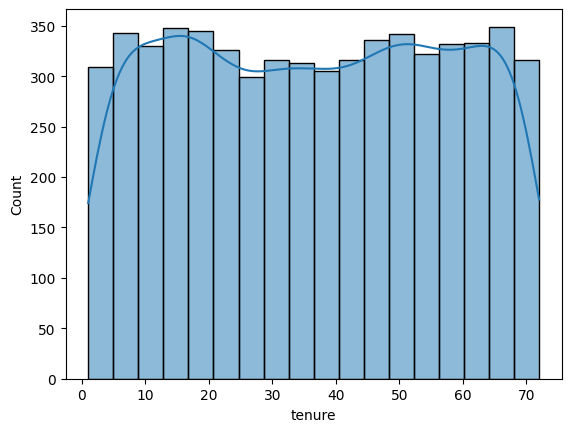

In [9]:
# Visualization: Distribution of tenure
sns.histplot(df["tenure"], kde=True)

In [10]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


#### Distribution of `tenure`, `MonthlyCharges`, and `TotalChages`

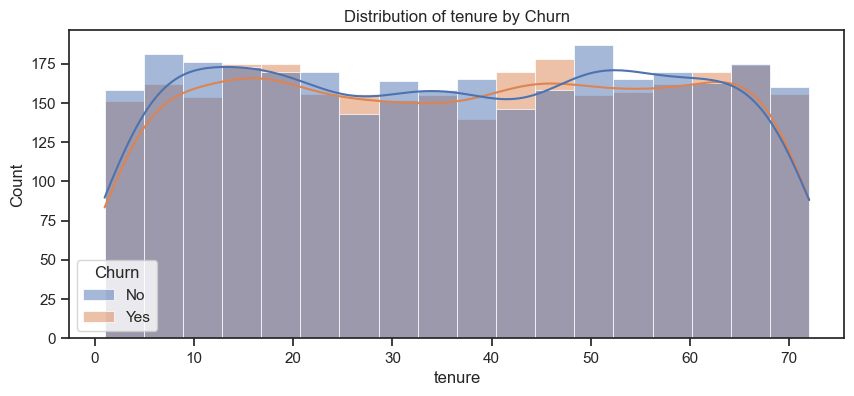

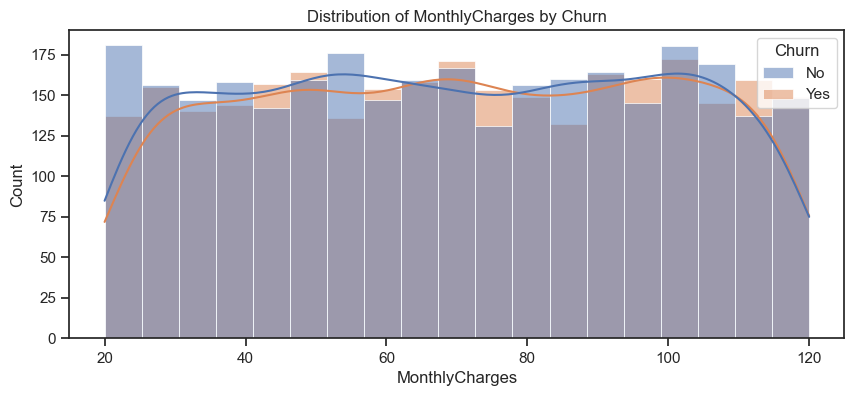

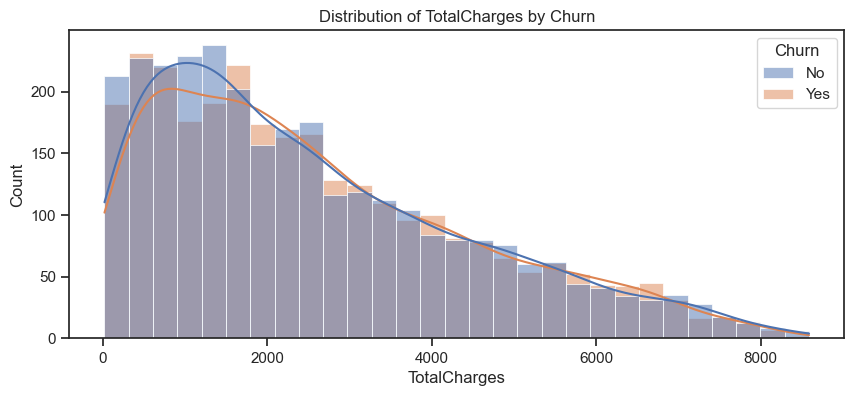

In [11]:
# Visualizing the distribution of numerical features with respect to churn
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    sns.set_theme(style="ticks")
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=col, kde=True, hue="Churn", linewidth=.5,)
    plt.title(f"Distribution of {col} by Churn")

## Feature-Specific Churn Analysis

In [12]:
df["Contract"].value_counts()  # Contract type distribution

Contract
Month-to-month    2020
One year          1954
Two year          1906
Name: count, dtype: int64

In [13]:
# Grouping by 'Contract' and calculating churn rate for each contract type to understand customer commitment impact
churn_rate_by_contract = df.groupby(['Contract', 'Churn']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
churn_rate_by_contract

Churn,No,Yes
Contract,,
Month-to-month,52.277228,47.722772
One year,49.539406,50.460594
Two year,50.262329,49.737671


In [14]:
# Grouping by 'InternetService' and calculating churn rate for each service type
churn_rate_by_internet_service = df.groupby(['InternetService', 'Churn']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
churn_rate_by_internet_service

Churn,No,Yes
InternetService,,
DSL,50.981405,49.018595
Fiber optic,50.861619,49.138381
No,50.320355,49.679645


In [15]:
df["TechSupport"].value_counts()  # Tech support service distribution

TechSupport
No internet service    2029
No                     1932
Yes                    1919
Name: count, dtype: int64

In [16]:
# Grouping by 'TechSupport' and calculating churn rate for each tech support service type
churn_rate_by_tech_support = df.groupby(['TechSupport', 'Churn']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
churn_rate_by_tech_support

Churn,No,Yes
TechSupport,,
No,50.000000,50.000000
No internet service,50.320355,49.679645
Yes,51.849922,48.150078


In [17]:
df["PaymentMethod"].value_counts()  # Payment method distribution

PaymentMethod
Credit card         1503
Electronic check    1488
Mailed check        1462
Bank transfer       1427
Name: count, dtype: int64

In [18]:
# Grouping by 'PaymentMethod' and calculating churn rate for each payment method type
churn_rate_by_payment_method = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
churn_rate_by_payment_method

Churn,No,Yes
PaymentMethod,,
Bank transfer,735,692
Credit card,753,750
Electronic check,752,736
Mailed check,742,720


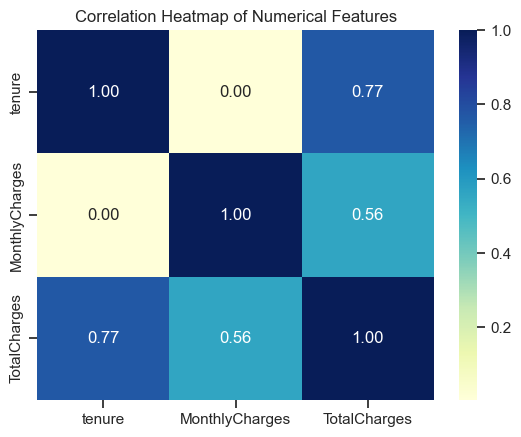

In [19]:
# Correlation heatmap for numerical features
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.000000,5880.000000,5880.000000,5880.000000
mean,0.500680,36.549150,70.157779,2566.813165
std,0.500042,20.909674,28.804615,1910.017743
min,0.000000,1.000000,20.000000,20.030000
25%,0.000000,18.000000,45.717500,1020.217500
50%,1.000000,37.000000,70.155000,2136.445000
75%,1.000000,55.000000,95.457500,3767.665000
max,1.000000,72.000000,119.990000,8589.600000


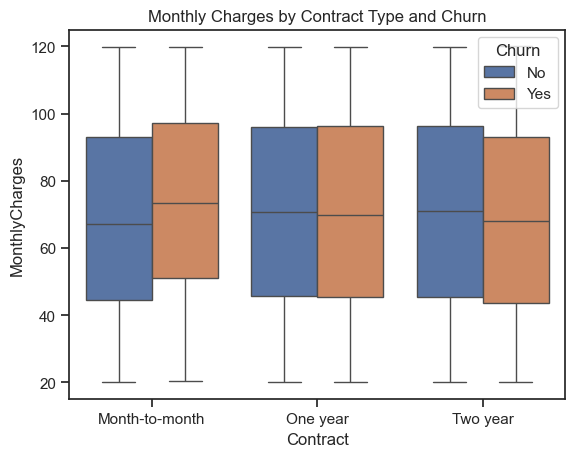

In [21]:
# Visualization: Contract vs MonthlyCharges vs Churn 
plt.figure()
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges by Contract Type and Churn')
plt.show()

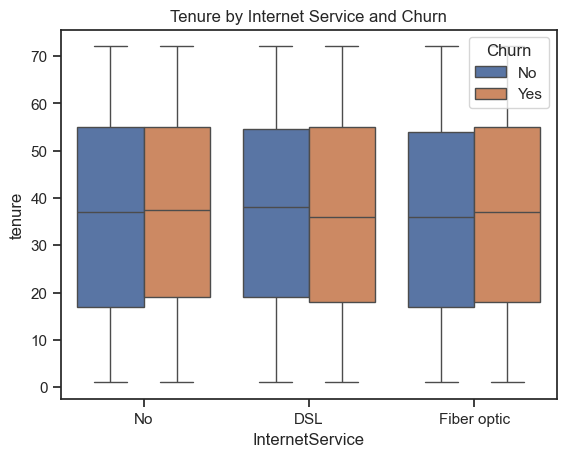

In [22]:
# Visualization: InternetService vs Tenure vs Churn
plt.figure()
sns.boxplot(data=df, x='InternetService', y='tenure', hue='Churn')
plt.title('Tenure by Internet Service and Churn')
plt.show()

## Customer Segmentation and Profiling
This section focuses on segmenting customers based on their tenure, charges, and churn status. We identify groups such as churned customers, high-value customers, and those at risk of churn. The analysis includes visualizations and metrics to profile customer segments and understand their behavior, which helps in targeting retention strategies and maximizing revenue.

In [23]:
# Filtering churned customers for further analysis
churned_customers = df[df["Churn"] == "Yes"]
churned_customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
6,CUST0006,Male,0,Yes,No,17,No,No phone service,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer,91.53,1556.01,Yes
7,CUST0007,Male,0,Yes,Yes,18,Yes,No,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,26.52,477.36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5872,CUST5872,Male,0,Yes,No,34,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Yes,One year,Yes,Electronic check,98.10,3335.40,Yes
5873,CUST5873,Female,1,Yes,No,27,No,No phone service,Fiber optic,No,...,No,Yes,No,Yes,Two year,Yes,Electronic check,34.06,919.62,Yes
5874,CUST5874,Male,0,No,Yes,37,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,56.74,2099.38,Yes
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes


In [24]:
print(f"Churned Customer: {churned_customers.shape[0]}")  # churned customers count

Churned Customer: 2898


In [25]:
# Count of customers with short and long tenure

short_tenure = (df["tenure"] < 12).sum()
long_tenure = (df["tenure"] >= 12).sum()

In [26]:
# churned customers with short tenure and long tenure
churned_short_tenure = churned_customers[churned_customers["tenure"] < 12]
churned_long_tenure = churned_customers[churned_customers["tenure"] >= 12]

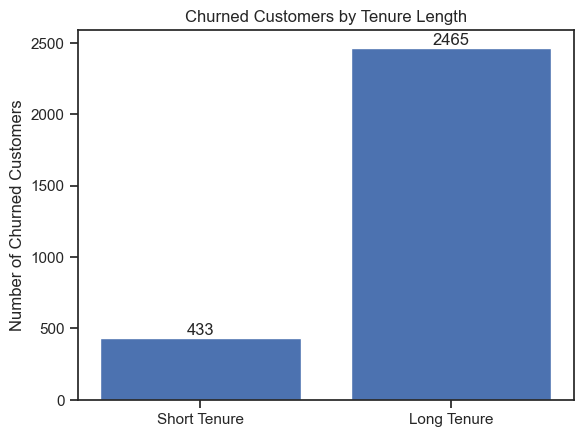

In [27]:
# To plot the number of churned customers with short and long tenure as a bar chart:
fig, ax = plt.subplots()
bars = ax.bar(['Short Tenure', 'Long Tenure'], [churned_short_tenure.shape[0], churned_long_tenure.shape[0]])
plt.ylabel('Number of Churned Customers')
plt.title('Churned Customers by Tenure Length')
ax.bar_label(bars, fmt='%.0f')
plt.show()

In [28]:
# Percentage of churned customers by Internet Service type

churned_customers["InternetService"].value_counts(normalize=True) * 100

InternetService
No             34.782609
DSL            32.746722
Fiber optic    32.470669
Name: proportion, dtype: float64

* **32.47%** of churned customer opted for **Fiber Optic** as Internet Service.<br>
* **32.74%** of churned customer opted for **DSL** as Internet Service.

#### High Value Customers
* Long Tenure
* High Charges
* Low Churn

This section defines high-value customers as those exhibiting long tenure, high charges, and low churn.

In [29]:
# Sorting TotalCharges in descending order

df["TotalCharges"].sort_values(ascending=False)

1765    8589.60
5082    8505.09
410     8498.16
1362    8478.00
5349    8449.20
         ...   
2884      30.42
3744      28.16
4360      23.78
401       20.13
3886      20.03
Name: TotalCharges, Length: 5880, dtype: float64

In [30]:
# Filtering long tenure customers and checking their TotalCharges

long_tenure_customers = df[df["tenure"] >= 12]
high_charges = long_tenure_customers["TotalCharges"]
high_charges

0       1146.55
1       4330.10
2       4963.83
3       7299.36
4       1305.50
         ...   
5875    5268.91
5876    1439.46
5877    4065.04
5878    1286.32
5879     585.35
Name: TotalCharges, Length: 4975, dtype: float64

In [31]:
# Calculating the median of TotalCharges for long tenure customers

high_charges_threshold = long_tenure_customers["TotalCharges"].median()

high_value_customers = df[
    (long_tenure) &
    (df["TotalCharges"] > high_charges_threshold) &
    (df["Churn"] == "No")
    ]

high_value_customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
5,CUST0005,Female,0,Yes,No,35,Yes,No,DSL,No,...,No,Yes,Yes,Yes,One year,No,Credit card,116.96,4093.60,No
12,CUST0012,Male,0,No,Yes,42,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,95.41,4007.22,No
21,CUST0021,Male,1,No,Yes,62,No,No phone service,DSL,Yes,...,No,No,Yes,Yes,One year,No,Mailed check,71.69,4444.78,No
30,CUST0030,Male,0,Yes,Yes,48,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,80.69,3873.12,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,CUST5848,Female,0,No,Yes,61,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,101.29,6178.69,No
5855,CUST5855,Female,1,Yes,Yes,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,117.05,6905.95,No
5860,CUST5860,Male,1,Yes,No,42,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card,60.74,2551.08,No
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No


In [32]:
high_value_customers.shape[0]  # Number of high-value customers who are not churned

1239

There are **1239** high valued customers

# Revenue Insights

- Average revenue per user (ARPU).

- Identify customers who pay more but are at risk of churn.

In [33]:
# Calculating the average revenue per user (ARPU)
# ARPU is typically calculated as the average monthly revenue per user

average_revenue_per_user = df["MonthlyCharges"].mean()
average_revenue_per_user

np.float64(70.15777891156462)

In [34]:
# Identifying at-risk high-paying customers

at_risk_high_payers = df[
    ((df["TotalCharges"] > high_charges_threshold) &
    (df["Churn"] == "Yes"))
]

at_risk_high_payers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
10,CUST0010,Male,1,Yes,No,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Month-to-month,No,Electronic check,36.87,2544.03,Yes
14,CUST0014,Female,0,Yes,Yes,48,Yes,Yes,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer,111.32,5343.36,Yes
18,CUST0018,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,84.40,4051.20,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,CUST5850,Male,0,No,Yes,71,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card,42.71,3032.41,Yes
5863,CUST5863,Female,1,Yes,No,26,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,108.11,2810.86,Yes
5865,CUST5865,Male,0,No,Yes,59,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer,48.92,2886.28,Yes
5867,CUST5867,Female,0,No,Yes,38,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card,89.69,3408.22,Yes


1248 customers are at a risk of high paying

# Service Usage Patterns

Usage vs. churn correlation (e.g., customers without tech support churn more?).

In [35]:
# Group the categories properly
df['tech_support_combined'] = df['TechSupport'].replace('No internet service', 'No')
df.groupby(['tech_support_combined', 'Churn']).size().unstack()

Churn,No,Yes
tech_support_combined,,
No,1987,1974
Yes,995,924


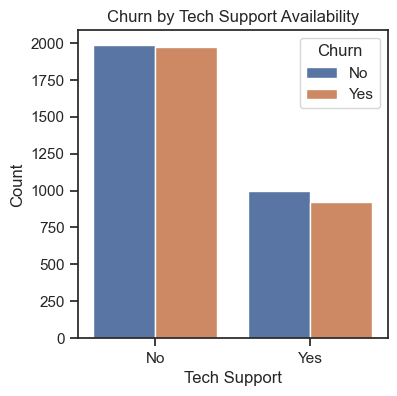

In [ ]:
# Visualizing churn by tech support availability
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='tech_support_combined', hue='Churn')
plt.title('Churn by Tech Support Availability')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'Tech Support Available')

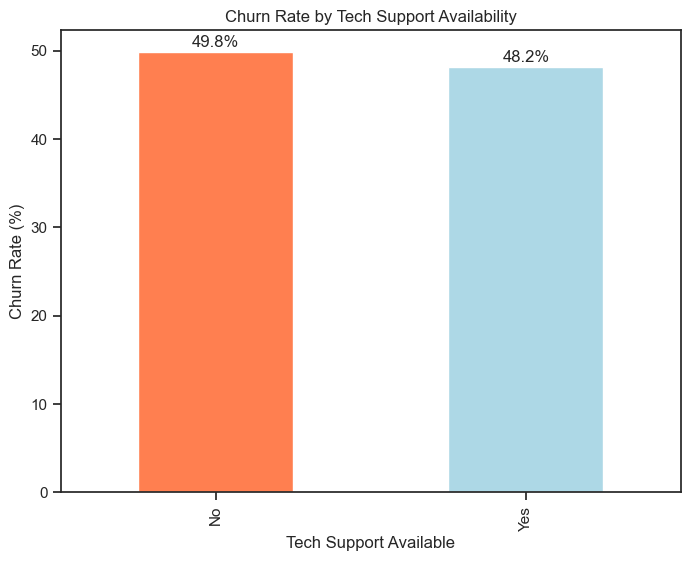

In [ ]:
# Calculating churn rate by tech support availability
churn_rates = df.groupby('tech_support_combined')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
churn_rates.plot(kind='bar', figsize=(8, 6), color=['coral', 'lightblue'])
for i, v in enumerate(churn_rates):
    plt.text(i, v + 0.3, f'{v:.1f}%', ha='center', va='bottom')
    
plt.title('Churn Rate by Tech Support Availability')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tech Support Available')

Customers without tech support DO churn slightly more - about 2 percentage points higher